# Numerical variables
This example is based on the examples posted on GitHub for [Feature Engineering for Machine Learning Course](https://github.com/solegalli/feature-engineering-for-machine-learning)

Most variables in a dataset can be classified into one of two major types: **Numerical variables** &
**Categorical variables**

**Numerical variables** can be further classified into:
- **Discrete variables** : whole numbers (counts), e.g., Number of children in the family
- **Continuous variables** : may contain any value within a range, eg. house price

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Let's load the loans dataset.
df = pd.read_csv('./datasets/loan.csv')
print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,customer_id,disbursed_amount,interest,market,employment,time_employed,householder,income,date_issued,target,loan_purpose,number_open_accounts,date_last_payment,number_credit_lines_12
0,0,23201.5,15.4840,C,Teacher,<=5 years,RENT,84600.0,2013-06-11,0,Debt consolidation,4.0,2016-01-14,NaN
1,1,7425.0,11.2032,B,Accountant,<=5 years,OWNER,102000.0,2014-05-08,0,Car purchase,13.0,2016-01-25,NaN
2,2,11150.0,8.5100,A,Statistician,<=5 years,RENT,69840.0,2013-10-26,0,Debt consolidation,8.0,2014-09-26,NaN
3,3,7600.0,5.8656,A,Other,<=5 years,RENT,100386.0,2015-08-20,0,Debt consolidation,20.0,2016-01-26,NaN
4,4,31960.0,18.7392,E,Bus driver,>5 years,RENT,95040.0,2014-07-22,0,Debt consolidation,14.0,2016-01-11,NaN


# Rename columns
# Variable definitions:
- disbursed_amount: loan amount given to the borrower.
- interest: interest rate.
- income: annual income.
- target: loan status (paid or being repaid = 1, defaulted = 0).

In [6]:
df = df.rename(columns={"disbursed_amount": "loan_amount", "income": "annual_income", "target": "loan_status"})
print(df.columns)

Index(['customer_id', 'loan_amount', 'interest', 'market', 'employment',
       'time_employed', 'householder', 'annual_income', 'date_issued',
       'loan_status', 'loan_purpose', 'number_open_accounts',
       'date_last_payment', 'number_credit_lines_12'],
      dtype='object')


## Continuous variables

In [12]:
# Let's look at the values of the variable loan_amount.
# This is the amount of money requested by the borrower. This variable is continuous.
print(df['loan_amount'].unique())
df.describe()

[23201.5   7425.   11150.   ...  6279.   12894.75 25584.  ]


,customer_id,loan_amount,interest,annual_income,loan_status,number_open_accounts,number_credit_lines_12
count,10000.00000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,238.000000
mean,4999.50000,14132.275500,12.678819,7.157229e+04,0.011700,12.516300,1.785714
std,2886.89568,8058.310311,4.214989,5.286105e+04,0.107537,5.402615,1.197873
min,0.00000,910.000000,4.841200,0.000000e+00,0.000000,1.000000,0.000000
25%,2499.75000,7840.000000,9.490000,4.365000e+04,0.000000,9.000000,1.000000
50%,4999.50000,12375.000000,12.396900,6.045000e+04,0.000000,12.000000,2.000000
75%,7499.25000,19200.000000,15.475500,8.536000e+04,0.000000,15.000000,2.000000
max,9999.00000,35000.000000,27.880000,2.185000e+06,1.000000,49.000000,6.000000


Text(0, 0.5, 'Number of loans')

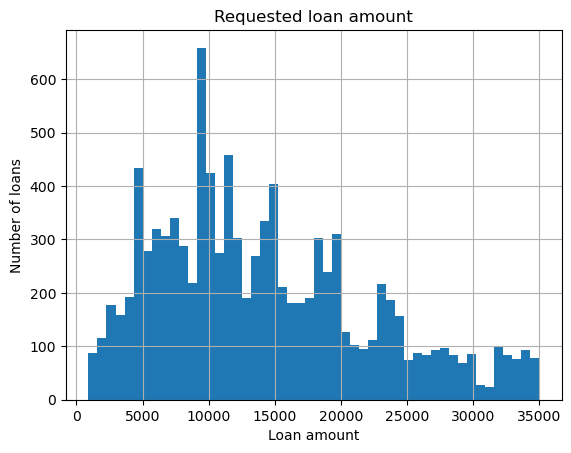

In [13]:
# Let's make a histogram to get familiar with the
# variable distribution.

# 
# A histogram counts of different intervals (or bins) of a continuous variable. 
# The x-axis intervals, while the y-axis shows the frequency or count of observations within each interval.
# Bins are the number of intervals you want to divide all of your data into
fig = df.loan_amount.hist(bins=50)

fig.set_title('Requested loan amount')
fig.set_xlabel('Loan amount')
fig.set_ylabel('Number of loans')

The variable's values vary across the entire value range. This is characteristic of continuous variables.

In [ ]:
# Let's examine the variable interest rate,
# This variable is also continuous: it can take, in principle,
# any value within the range.
df['interest'].unique()

In [ ]:
# Let's make a histogram to get familiar with the
# variable distribution.

fig = df['interest'].hist(bins=30)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

The variable's values vary continuously across the entire value range.

In [ ]:
# Now, let's explore the income declared by the customers,
# that is, how much they earn yearly.

# This variable is also continuous.

fig = df['annual_income'].hist(bins=100)

# For better visualisation, I display a specific
# range in the x-axis.
fig.set_xlim(0, 400000)

# title and axis legends
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

Only a few consumers earn greater salaries, with the majority of salaries falling between USD 30 and USD 70,000.
Because this is a continuous variable, the variable's values vary continuously across the variable range.

## Discrete variables

In [ ]:
# Let's inspect the values of the number_open_accounts variable.
# This variable represents the borrower's total number of credit items (for example, credit cards, car loans, mortgages, etc.). 
# This is a discrete variable, because a borrower can have 1 credit card, but not 3.5 credit cards.

# Remove missing values using dropna then get unique ones
df['number_open_accounts'].dropna().unique()

In [ ]:
# Let's make an histogram to get familiar with the variable distribution.
y = df['number_open_accounts'].value_counts().sort_index()
print(y)
fig = y.plot.bar()

# For better visualisation, I display a specific
# value range in the x-axis.
fig.set_xlim(0, 30)

# Title and axis labels.
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

Use a bar chart for discrete variables and histograms for continuous variables